<a href="https://colab.research.google.com/github/shreyaskp150/Bootcamp_frontend2020/blob/master/Pepper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Pepper Dataset/segmented",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2475 files belonging to 2 classes.


In [39]:
class_names=dataset.class_names
class_names

['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']

In [40]:
len(dataset)

78

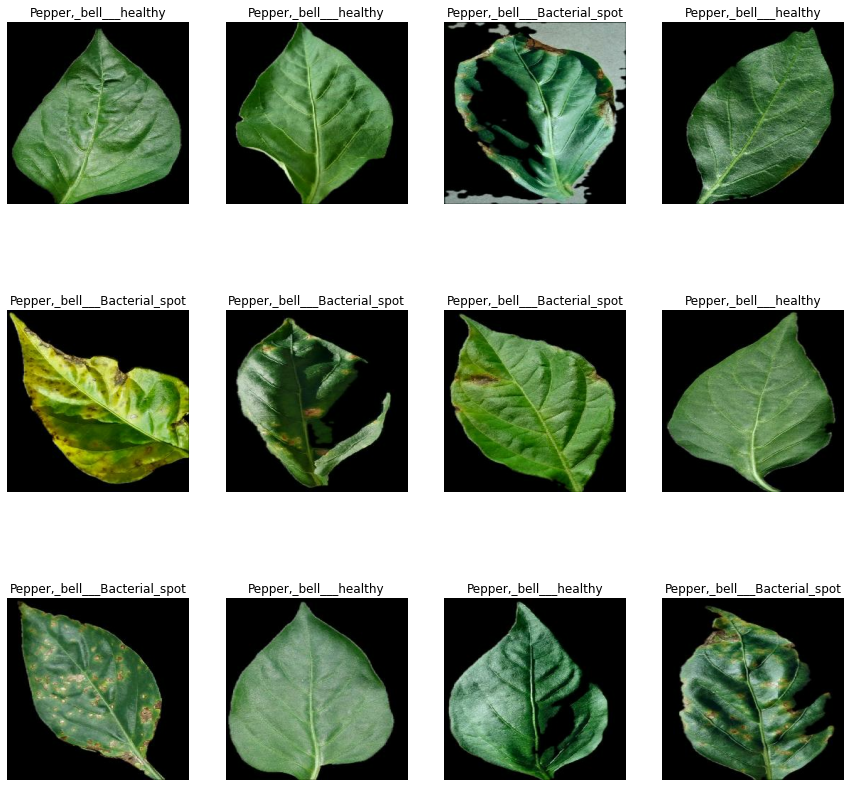

In [41]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [42]:
len(dataset)

78

In [43]:
train_size = 0.8
len(dataset)*train_size

62.400000000000006

In [44]:
train_ds = dataset.take(54)
len(train_ds)

54

In [45]:
test_ds = dataset.skip(54)
len(test_ds)

24

In [46]:
val_size=0.1
len(dataset)*val_size

7.800000000000001

In [47]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [48]:
test_ds = test_ds.skip(6)
len(test_ds)

18

In [49]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [50]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [51]:
len(train_ds)

62

In [52]:
len(val_ds)

7

In [53]:
len(test_ds)

9

In [54]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [55]:
 resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [56]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [57]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (32, 30, 30, 64)         

In [59]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [60]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
62/62 [==============================] - 420s 201ms/step - loss: 0.5552 - accuracy: 0.7132 - val_loss: 0.5246 - val_accuracy: 0.9420
Epoch 2/50
62/62 [==============================] - 7s 110ms/step - loss: 0.1739 - accuracy: 0.9516 - val_loss: 0.9737 - val_accuracy: 0.9643
Epoch 3/50
62/62 [==============================] - 7s 110ms/step - loss: 0.0670 - accuracy: 0.9761 - val_loss: 1.0872 - val_accuracy: 0.9911
Epoch 4/50
62/62 [==============================] - 7s 110ms/step - loss: 0.0434 - accuracy: 0.9842 - val_loss: 1.0496 - val_accuracy: 0.9866
Epoch 5/50
62/62 [==============================] - 7s 110ms/step - loss: 0.0313 - accuracy: 0.9888 - val_loss: 1.2704 - val_accuracy: 0.9866
Epoch 6/50
62/62 [==============================] - 7s 110ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 1.2415 - val_accuracy: 0.9777
Epoch 7/50
62/62 [==============================] - 7s 110ms/step - loss: 0.0378 - accuracy: 0.9893 - val_loss: 1.0238 - val_accuracy: 0.9911
Epoc

In [61]:
scores = model.evaluate(test_ds)

9/9 [==============================] - 6s 50ms/step - loss: 0.0387 - accuracy: 0.9965


In [62]:
scores

[0.038700394332408905, 0.9965277910232544]

In [63]:
history

In [64]:
history.params

{'epochs': 50, 'steps': 62, 'verbose': 1}

In [65]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [66]:
type(history.history['loss'])

list

In [67]:
len(history.history['loss'])

50

In [68]:
history.history['loss'][:5]

[0.5551666021347046,
 0.17389653623104095,
 0.06699150055646896,
 0.043363939970731735,
 0.031347379088401794]

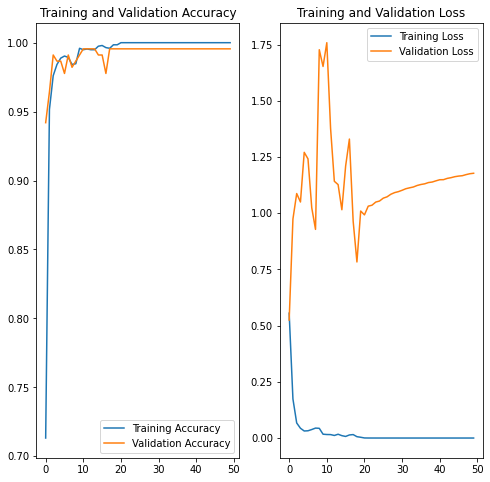

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Pepper,_bell___Bacterial_spot
predicted label: Pepper,_bell___Bacterial_spot


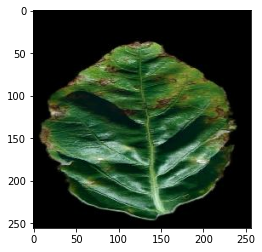

In [70]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [71]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

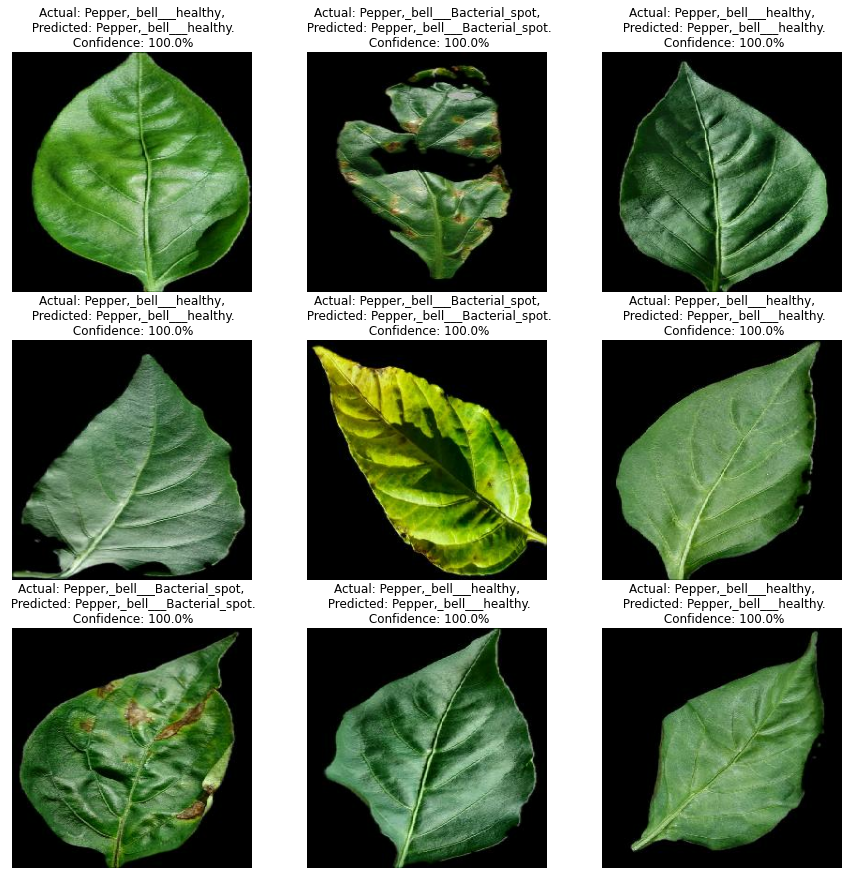

In [72]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [73]:
import os
model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/models") + [0]])+1
model.save(f"/content/drive/MyDrive/Colab Notebooks/models/{model_version}")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/models/3/assets


In [74]:
model.save("/content/drive/MyDrive/Colab Notebooks/pepper_segmented.h5")